There is an open-source, commercially usable machine learning toolkit called [scikit-learn](https://scikit-learn.org/stable/index.html). This toolkit contains implementations of many of the algorithms

In [22]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import SGDRegressor
from sklearn.preprocessing import StandardScaler
from lab_utils_multi import  load_house_data
from lab_utils_common import dlc
np.set_printoptions(precision=2)
plt.style.use('./deeplearning.mplstyle')

# Gradient Descent
Scikit-learn has a gradient descent regression model [sklearn.linear_model.SGDRegressor](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.SGDRegressor.html#examples-using-sklearn-linear-model-sgdregressor).  Like our previous implementation of gradient descent, this model performs best with normalized inputs. [sklearn.preprocessing.StandardScaler](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html#sklearn.preprocessing.StandardScaler) will perform z-score normalization as in a  prject we did previously. Here it is referred to as 'standard score'.

# Load data set

In [23]:
x_train , y_train = load_house_data()
x_features = ['size(Sqft)', 'bedrooms', 'floors', 'age']

# Scale / Normalize the training data

In [24]:
scaler = StandardScaler()
x_norm = scaler.fit_transform(x_train)
print(f"Peak to Peak range by column before normalization: x: {np.ptp(x_train, axis = 0)}")
print(f"Peak to Peak range by column after normalization: x: {np.ptp(x_norm, axis = 0)}")


Peak to Peak range by column before normalization: x: [2.41e+03 4.00e+00 1.00e+00 9.50e+01]
Peak to Peak range by column after normalization: x: [5.85 6.14 2.06 3.69]


# Create and Fit Regression Model

In [25]:
sgdr = SGDRegressor(max_iter = 1000)
#now we will just give training data (input and output)
sgdr.fit(x_norm, y_train)
print(sgdr)
print(f"Number of iterations completed: {sgdr.n_iter_}, number of weight updated : {sgdr.t_}")


SGDRegressor(alpha=0.0001, average=False, early_stopping=False, epsilon=0.1,
             eta0=0.01, fit_intercept=True, l1_ratio=0.15,
             learning_rate='invscaling', loss='squared_loss', max_iter=1000,
             n_iter_no_change=5, penalty='l2', power_t=0.25, random_state=None,
             shuffle=True, tol=0.001, validation_fraction=0.1, verbose=0,
             warm_start=False)
Number of iterations completed: 133, number of weight updated : 13168.0


# View Parameters

In [26]:
b_norm = sgdr.intercept_
w_norm = sgdr.coef_
print(f"Model Parameters: w: {w_norm}, b: {b_norm}")

Model Parameters: w: [110.24 -21.1  -32.52 -38.04], b: [363.17]


# Making Prediction

In [27]:
# make a prediction using sgdr.predict()
y_pred_sgd = sgdr.predict(x_norm)
# make a prediction using w,b. 
y_pred = np.dot(x_norm,w_norm) + b_norm
print(f"Prediction using sgdr.predict() : {y_pred_sgd[:4]}")

print(f"Prediction using w and b values : {y_pred[:4]}")

print(f"Targeted values: {y_train[:4]}")

Prediction using sgdr.predict() : [295.18 485.94 389.6  492.11]
Prediction using w and b values : [295.18 485.94 389.6  492.11]
Targeted values: [300.  509.8 394.  540. ]


# Plot Result

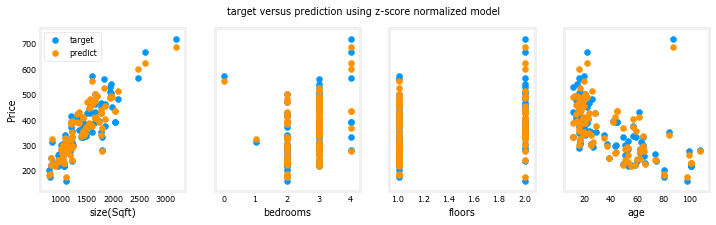

In [28]:
# plot predictions and targets vs original features    
fig, ax = plt.subplots(1, 4, figsize = (12,3) , sharey = True)
for i in range (len(ax)):
    #plotting orignal data
    ax[i].scatter(x_train[:,i], y_train, label = 'target')
    ax[i].set_xlabel(x_features[i])
    
    #plotting predicted values
    ax[i].scatter(x_train[:,i], y_pred, color = dlc["dlorange"], label = 'predict')
ax[0].set_ylabel("Price"); ax[0].legend();
fig.suptitle("target versus prediction using z-score normalized model")
plt.show()